# Importing the libraries

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings
import pickle
import joblib

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE

# Loading the data

In [2]:
df=pd.read_csv(r"C:\Users\khush\Documents\ML Ex\Assignment\Encoded Customer Churn.csv")

In [3]:
df.head()

,Unnamed: 0,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_Group,MonthlyCharges_Binned,AverageMonthlyCharge,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,BothStreamingServices
0,0,7590-VHVEG,0.0,-1.240847,-1.229192,-0.998573,No,0,1,29.850000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,1,5575-GNVDE,0.0,0.103981,-0.300615,-0.142629,No,2,2,55.573529,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,2,3668-QPYBK,0.0,-1.200094,-0.406836,-0.962534,Yes,0,2,54.075000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,3,7795-CFOCW,0.0,0.552257,-0.802595,-0.165068,No,3,2,40.905556,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,4,9237-HQITU,0.0,-1.200094,0.170527,-0.942512,Yes,0,3,75.825000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [4]:
df.isnull().sum()

Unnamed: 0                                 0
customerID                                 0
SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Tenure_Group                               0
MonthlyCharges_Binned                      0
AverageMonthlyCharge                       0
Revenue_Contribution                       0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetSe

In [5]:
encoder=OneHotEncoder(sparse_output=False)

In [6]:
df['Churn'] = encoder.fit_transform(df[['Churn']])

In [7]:
df['Churn'].value_counts()

Churn
1.0    265
0.0     94
Name: count, dtype: int64

In [8]:
df['Churn'].isnull().sum()

0

# Creating Independent and dependent features

In [9]:
X=df.drop('Churn', axis=1)
y=df['Churn']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape, y_train.shape)

(287, 52) (287,)


In [12]:
print(X_test.shape, y_test.shape)

(72, 52) (72,)


# Exporting the data

In [13]:
PROJECT_DIR=r"C:\Users\khush\Documents\ML Ex\Assignment"
DATA_DIR="Data"

In [14]:
def export_data(X, y, name):
    file_name = f"{name}.csv"
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    
    X.join(y).to_csv(file_path, index=False)
    
    return pd.read_csv(file_path).head()

In [15]:
export_data(X_train, y_train, "train")

,Unnamed: 0,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Tenure_Group,MonthlyCharges_Binned,AverageMonthlyCharge,Revenue_Contribution,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,BothStreamingServices,Churn
0,289,3580-REOAC,0.0,-0.874076,-0.715219,-0.811910,0,2,43.540000,448.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0
1,335,4322-RCYMT,0.0,1.489561,0.345278,1.424341,5,3,77.852206,5154.4,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.0
2,231,3316-UWXUY,0.0,0.756019,0.951766,1.172826,4,0,94.950000,4675.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1.0
3,75,2673-CXQEU,1.0,1.000533,1.534269,1.813524,4,4,109.633929,6188.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1.0
4,194,2146-EGVDT,0.0,1.122790,-1.590687,-0.463347,4,5,20.215254,1138.7,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1.0


In [16]:
export_data(X_test, y_test, "test")

,Unnamed: 0,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Tenure_Group,MonthlyCharges_Binned,AverageMonthlyCharge,Revenue_Contribution,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,BothStreamingServices,Churn
0,224,5961-VUSRV,0.0,-0.792571,-1.588973,-0.911352,0,5,18.279167,232.20,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1.0
1,42,9867-JCZSP,0.0,-0.588809,-1.541002,-0.819804,1,1,24.602941,352.75,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1.0
2,285,6202-DYYFX,0.0,-0.385047,0.352131,-0.191372,1,3,81.072727,1672.00,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1.0
3,302,8266-VBFQL,0.0,-1.118590,0.845545,-0.848156,0,0,89.162500,361.60,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0
4,56,8769-KKTPH,0.0,1.285799,1.162495,1.892552,5,0,100.177778,6277.95,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1.0


# Feature selection

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 289 to 102
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               287 non-null    int64  
 1   customerID                               287 non-null    object 
 2   SeniorCitizen                            287 non-null    float64
 3   tenure                                   287 non-null    float64
 4   MonthlyCharges                           287 non-null    float64
 5   TotalCharges                             287 non-null    float64
 6   Tenure_Group                             287 non-null    int64  
 7   MonthlyCharges_Binned                    287 non-null    int64  
 8   AverageMonthlyCharge                     287 non-null    float64
 9   Revenue_Contribution                     287 non-null    float64
 10  gender_Female                            287 non-null

In [14]:
X_train.drop(columns=['Unnamed: 0', 'customerID'], inplace=True)

In [15]:
X_test.drop(columns=['Unnamed: 0', 'customerID'], inplace=True)

In [16]:
y_train

289    0.0
335    0.0
231    1.0
75     1.0
194    1.0
      ... 
71     1.0
106    1.0
270    0.0
348    1.0
102    1.0
Name: Churn, Length: 287, dtype: float64

In [17]:
estimator = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
    estimator=estimator,
    scoring="r2"
)

In [18]:
# Fit the feature selector on the training data only
selector.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(max_depth=3,
                                                                  n_estimators=10,
                                                                  random_state=42),
                                 scoring='r2')

In [19]:
# Transform both the training and validation sets using the fitted selector
X_train_selected = selector.transform(X_train)

In [20]:
X_test_selected = selector.transform(X_test)

In [21]:
X_train_selected

,SeniorCitizen,TotalCharges,MonthlyCharges_Binned,AverageMonthlyCharge,Revenue_Contribution,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,BothStreamingServices
289,0.0,-0.811910,2,43.540000,448.50,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
335,0.0,1.424341,3,77.852206,5154.40,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
231,0.0,1.172826,0,94.950000,4675.00,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
75,1.0,1.813524,4,109.633929,6188.00,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
194,0.0,-0.463347,5,20.215254,1138.70,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,-0.510317,1,20.974038,1060.80,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
106,0.0,2.349072,4,101.431250,7498.80,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
270,1.0,-0.316750,0,94.450000,1511.20,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
348,0.0,-0.553491,2,43.341304,1033.85,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [22]:
selected_features_mask = selector.get_support()

* `selector.get_support()` returns a boolean array where `True` indicates that the feature has been selected.
* You use this mask to filter out the names of the selected features from the feature names in `X_train.columns`

In [23]:
selected_feature_names = X_train.columns[selected_features_mask]

In [24]:
print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['SeniorCitizen', 'TotalCharges', 'MonthlyCharges_Binned',
       'AverageMonthlyCharge', 'Revenue_Contribution', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
    

In [25]:
# Get the feature performance scores
feature_scores = selector.feature_performance_

In [26]:
feature_scores

{'SeniorCitizen': -0.3474178403755868,
 'tenure': -0.4009467918622848,
 'MonthlyCharges': -0.42064162754303597,
 'TotalCharges': -0.2938888888888889,
 'Tenure_Group': -0.4916431924882629,
 'MonthlyCharges_Binned': -0.3474178403755868,
 'AverageMonthlyCharge': -0.34741784037558676,
 'Revenue_Contribution': -0.3310563380281691,
 'gender_Female': -0.3474178403755868,
 'gender_Male': -0.3474178403755868,
 'Partner_No': -0.3474178403755868,
 'Partner_Yes': -0.3474178403755868,
 'Dependents_No': -0.3474178403755868,
 'Dependents_Yes': -0.3474178403755868,
 'MultipleLines_No': -0.3474178403755868,
 'MultipleLines_No phone service': -0.3474178403755868,
 'MultipleLines_Yes': -0.3474178403755868,
 'InternetService_DSL': -0.3474178403755868,
 'InternetService_Fiber optic': -0.3474178403755868,
 'InternetService_No': -0.3474178403755868,
 'OnlineSecurity_No': -0.3474178403755868,
 'OnlineSecurity_No internet service': -0.3474178403755868,
 'OnlineSecurity_Yes': -0.3474178403755868,
 'OnlineBackup

In [27]:
sorted_feat_imp = dict(sorted(feature_scores.items(), key=lambda val: val[1]))
sorted_feat_imp

{'Tenure_Group': -0.4916431924882629,
 'MonthlyCharges': -0.42064162754303597,
 'tenure': -0.4009467918622848,
 'SeniorCitizen': -0.3474178403755868,
 'MonthlyCharges_Binned': -0.3474178403755868,
 'gender_Female': -0.3474178403755868,
 'gender_Male': -0.3474178403755868,
 'Partner_No': -0.3474178403755868,
 'Partner_Yes': -0.3474178403755868,
 'Dependents_No': -0.3474178403755868,
 'Dependents_Yes': -0.3474178403755868,
 'MultipleLines_No': -0.3474178403755868,
 'MultipleLines_No phone service': -0.3474178403755868,
 'MultipleLines_Yes': -0.3474178403755868,
 'InternetService_DSL': -0.3474178403755868,
 'InternetService_Fiber optic': -0.3474178403755868,
 'InternetService_No': -0.3474178403755868,
 'OnlineSecurity_No': -0.3474178403755868,
 'OnlineSecurity_No internet service': -0.3474178403755868,
 'OnlineSecurity_Yes': -0.3474178403755868,
 'OnlineBackup_No': -0.3474178403755868,
 'OnlineBackup_No internet service': -0.3474178403755868,
 'OnlineBackup_Yes': -0.3474178403755868,
 'De

# Model training

## 1. Logistic Regression

### Why did I Choose Logistic Regression?
It's a good baseline model for binary classification problems such as churn prediction.

In [28]:
## Model training
logistic = LogisticRegression(max_iter=1000, solver='liblinear')

In [29]:
logistic.fit(X_train_selected, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [30]:
y_preds = logistic.predict(X_test_selected)

In [31]:
y_preds

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1.])

In [32]:
# Predict probabilities for the positive class
y_pred_proba=logistic.predict_proba(X_test_selected)[:, 1]

In [33]:
y_pred_proba

array([0.96312016, 0.98317573, 0.71038426, 0.4510364 , 0.96355698,
       0.58101276, 0.98473703, 0.94480836, 0.61156105, 0.95872502,
       0.34698586, 0.33749506, 0.59685724, 0.70273853, 0.8140164 ,
       0.45403696, 0.63688045, 0.71977728, 0.37699364, 0.51419531,
       0.99301514, 0.96046188, 0.90986637, 0.92364468, 0.25698625,
       0.36109388, 0.45926901, 0.95651493, 0.83057877, 0.97862689,
       0.73039888, 0.97339878, 0.29244967, 0.92294369, 0.48566656,
       0.30730531, 0.91695021, 0.95165106, 0.86246966, 0.69148163,
       0.65385879, 0.98780625, 0.97685906, 0.77899201, 0.97775264,
       0.40914617, 0.29962649, 0.20968508, 0.68895689, 0.98276979,
       0.63840524, 0.21315181, 0.92922465, 0.63835728, 0.86668607,
       0.88896906, 0.94610871, 0.91624582, 0.92332402, 0.455416  ,
       0.95186984, 0.55067803, 0.58008662, 0.78378661, 0.9731718 ,
       0.97674131, 0.97171955, 0.9551705 , 0.28484063, 0.85393976,
       0.96614974, 0.75249017])

In [34]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

In [35]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.875
Precision: 0.8909090909090909
Recall: 0.9423076923076923
F1-score: 0.9158878504672897


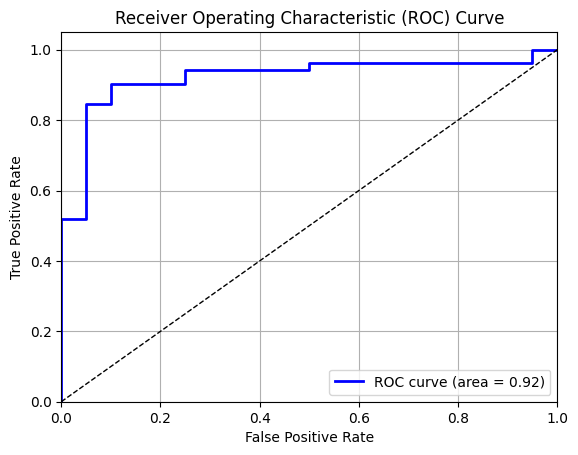

In [36]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Calculate the area under the curve

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show();

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.82      0.70      0.76        20
         1.0       0.89      0.94      0.92        52

    accuracy                           0.88        72
   macro avg       0.86      0.82      0.84        72
weighted avg       0.87      0.88      0.87        72



## Observations
* Logistic regression performs well in identifying churners, as indicated by the high precision and recall for class 1.0.
* However, the performance for class 0.0 (non-churners) is lower, which might indicate that the model is biased toward predicting churners. Depending on the business context, we may want to improve this if false positives (predicting a churner when they are not) have significant costs.
* The high AUC score suggests that the model's overall performance is strong and indicates a good ability to distinguish between churners and non-churners.

## To handle the class imbalance, we will be applying SMOTE (Synthetic Minority Over-sampling Technique) to the training dataset

In [38]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_selected, y_train)

In [39]:
logistic.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, solver='liblinear')

In [40]:
y_preds = logistic.predict(X_test_selected)

In [41]:
# Predict probabilities for the positive class
y_pred_proba=logistic.predict_proba(X_test_selected)[:, 1]

In [42]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

In [43]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8055555555555556
Precision: 0.9523809523809523
Recall: 0.7692307692307693
F1-score: 0.851063829787234


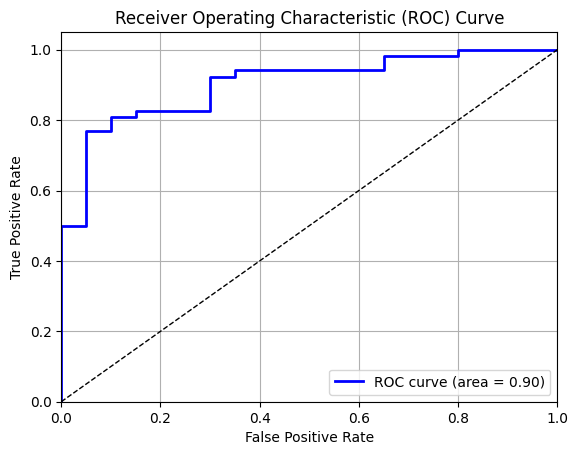

In [44]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Calculate the area under the curve

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show();

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.60      0.90      0.72        20
         1.0       0.95      0.77      0.85        52

    accuracy                           0.81        72
   macro avg       0.78      0.83      0.79        72
weighted avg       0.85      0.81      0.81        72



## Observations
* **Improvement in Recall for Non-Churners:** The recall for non-churners (class 0.0) has significantly increased, indicating that SMOTE has helped the model become more sensitive to identifying non-churners.
* **Trade-off in Precision for Non-Churners:** However, this comes at the cost of lower precision for non-churners, suggesting that the model is misclassifying more churners as non-churners.
* **Churners (Class 1.0):** The precision remains high, but the recall has dropped. This suggests that while the model is good at predicting churners when it does, it misses a significant number of them.
* **Overall Performance:** The overall accuracy and the weighted average metrics indicate that the model has improved performance after applying SMOTE, but there is still room for refinement.

## 2. Random forest

### Why did I Choose Random Forest?
* **Non-linearity:** Random Forest can handle complex relationships between features and target variables.
* **Feature Importance:** It provides insights into the importance of different features in the prediction.
* **Robustness:** It performs well in the presence of outliers and missing data.

In [46]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [47]:
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [48]:
y_preds = rf_model.predict(X_test_selected)
y_pred_proba = rf_model.predict_proba(X_test_selected)[:, 1]

In [49]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

In [50]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8055555555555556
Precision: 0.8518518518518519
Recall: 0.8846153846153846
F1-score: 0.8679245283018868


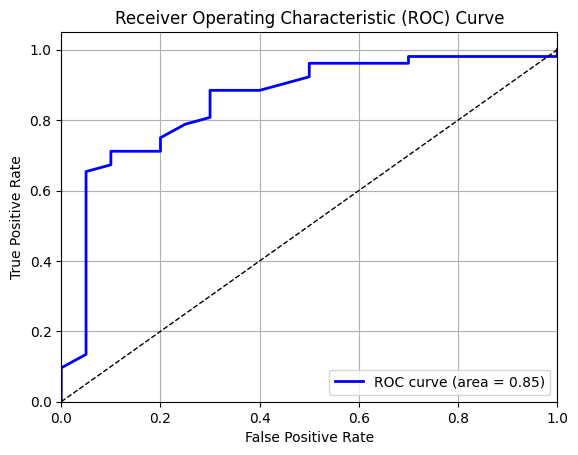

In [51]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Calculate the area under the curve

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show();

In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.67      0.60      0.63        20
         1.0       0.85      0.88      0.87        52

    accuracy                           0.81        72
   macro avg       0.76      0.74      0.75        72
weighted avg       0.80      0.81      0.80        72



In [53]:
# Get feature importance scores
feature_importances = rf_model.feature_importances_

In [54]:
features = pd.DataFrame({
    'Feature': X_resampled.columns,  # X_train is your feature set
    'Importance': feature_importances
})

In [55]:
# Sort the DataFrame by feature importance
features_sorted = features.sort_values(by='Importance', ascending=False)

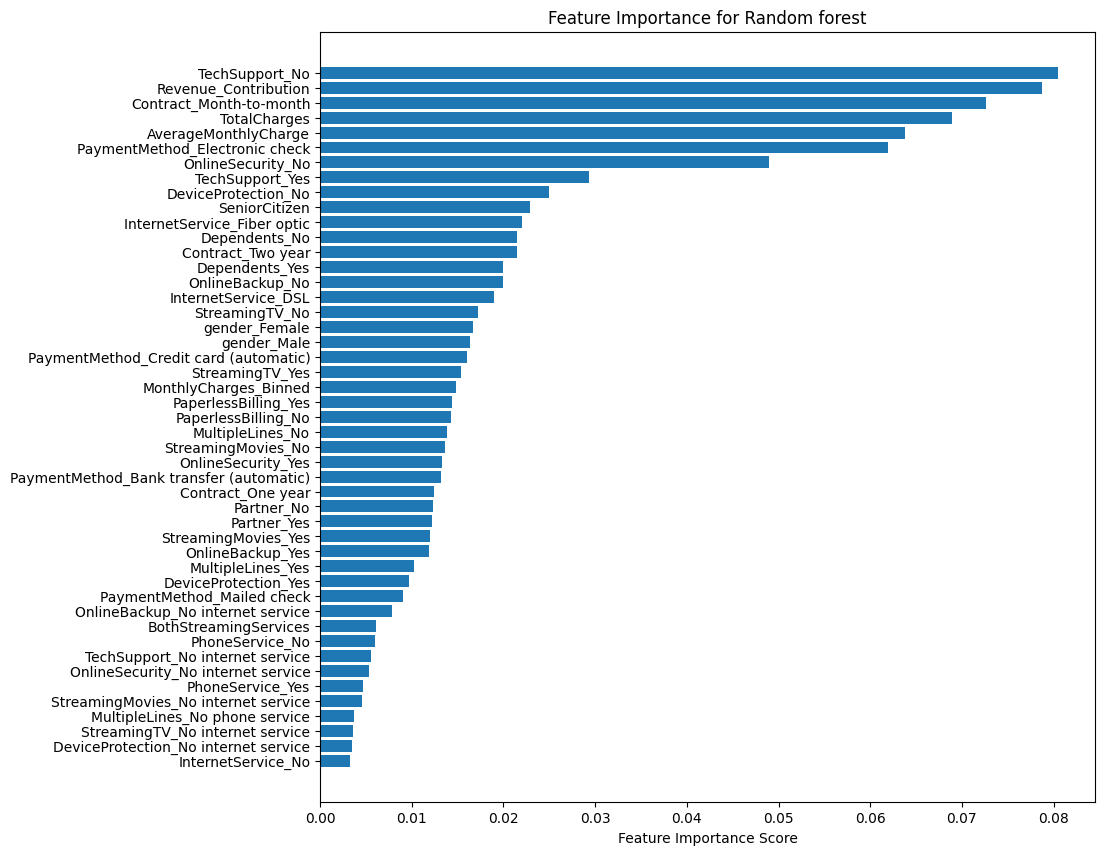

In [56]:
# Plotting the feature importances
plt.figure(figsize=(10,10))
plt.barh(features_sorted['Feature'], features_sorted['Importance'])
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance for Random forest')
plt.gca().invert_yaxis()  # Invert to show most important feature at the top
plt.show()

## Key Observations:
* Both models have the same accuracy of 0.81.
* **Logistic Regression** shows higher precision for Class 1 but lower recall compared to Random Forest. Its recall for Class 0 is quite high at 0.90, meaning it's better at identifying negatives.
* **Random Forest Classifier** has better overall precision and recall for Class 1 but performs slightly worse on Class 0 compared to Logistic Regression.
* The **F1-score** is slightly higher for Logistic Regression for Class 1, but Random Forest has a better balance between precision and recall for Class 1.
* Depending on the importance of false positives vs false negatives in your application, you might choose one model over the other:

    **Logistic Regression: Higher recall for negatives, higher precision for positives.**


    **Random Forest: Better balance of precision and recall for positives.**

## 3. Gradient Boosting

### Why Choose Gradient Boosting?
* **Boosting:** This model focuses on correcting mistakes of previous models, making it highly accurate for binary classification.
* **Efficiency:** It’s often one of the top-performing algorithms for classification problems, especially when there are a lot of weak learners.

In [63]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [64]:
# Fit the model on the training data
gb_model.fit(X_resampled, y_resampled)

GradientBoostingClassifier(random_state=42)

In [65]:
# Predictions on the validation set
y_preds = gb_model.predict(X_test_selected)
y_pred_proba = gb_model.predict_proba(X_test_selected)[:, 1]

In [66]:
y_preds.shape, y_pred_proba.shape

((72,), (72,))

In [67]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

In [68]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8194444444444444
Precision: 0.8823529411764706
Recall: 0.8653846153846154
F1-score: 0.8737864077669902


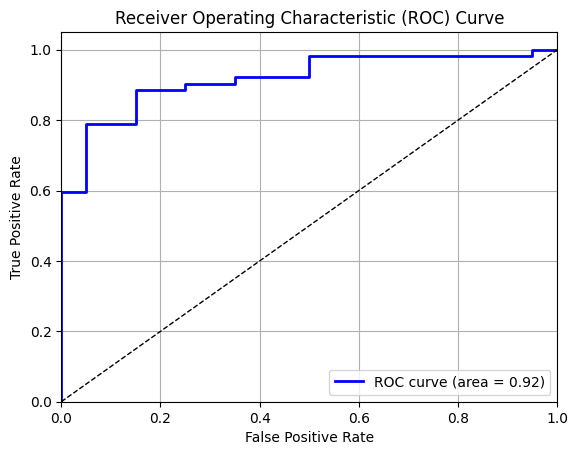

In [133]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Calculate the area under the curve

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show();

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.67      0.70      0.68        20
         1.0       0.88      0.87      0.87        52

    accuracy                           0.82        72
   macro avg       0.77      0.78      0.78        72
weighted avg       0.82      0.82      0.82        72



In [70]:
# Get feature importance scores
feature_importances = gb_model.feature_importances_

In [71]:
# Create a DataFrame to visualize feature importances
features = pd.DataFrame({
    'Feature': X_resampled.columns,  # X_train is your feature set
    'Importance': feature_importances
})

In [72]:
# Sort the DataFrame by feature importance
features_sorted = features.sort_values(by='Importance', ascending=False)

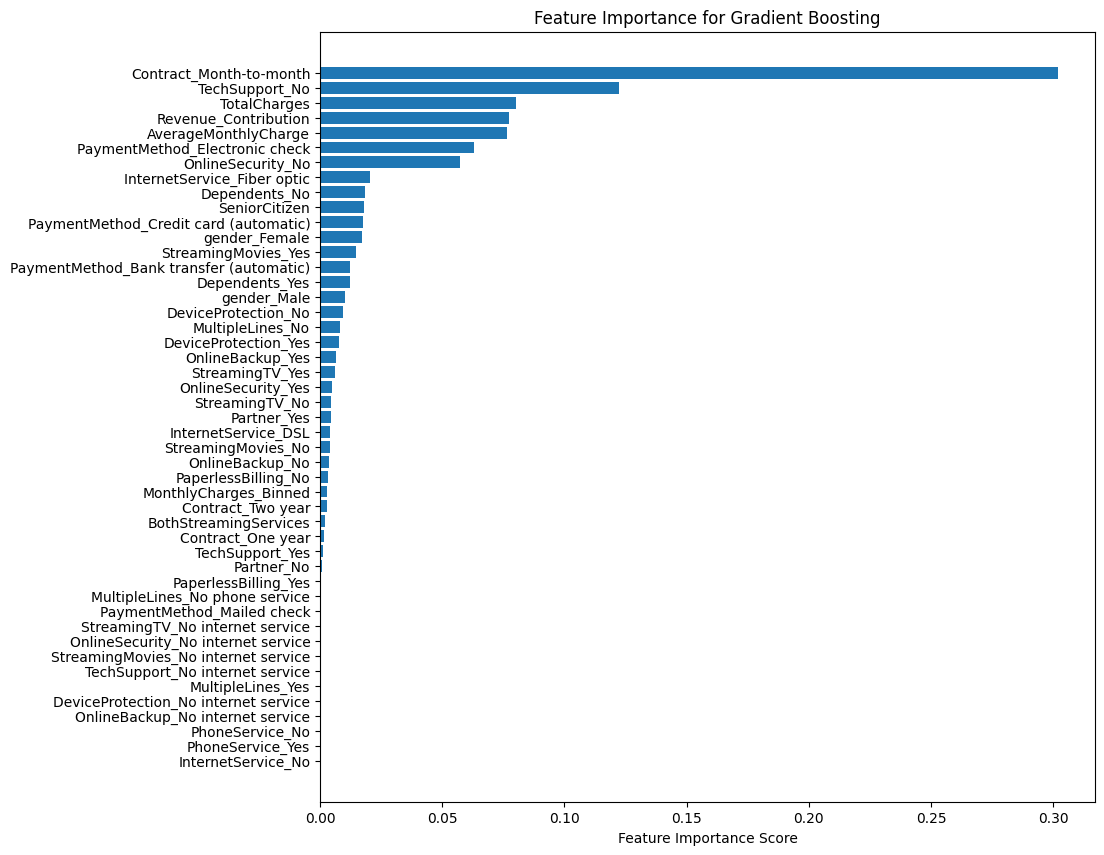

In [74]:
# Plotting the feature importances
plt.figure(figsize=(10,10))
plt.barh(features_sorted['Feature'], features_sorted['Importance'])
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance for Gradient Boosting')
plt.gca().invert_yaxis()  # Invert to show most important feature at the top
plt.show()

## Summary of Observations
* Accuracy:

All three models have similar accuracy values, with Gradient Boosting slightly outperforming the others at 0.85.


* Precision:

Logistic Regression has lower precision for class 0 compared to Gradient Boosting, which indicates that it makes more false positives for the non-churn class.


Random Forest shows very high precision for class 1 but suffers in precision for class 0.


* Recall:

Random Forest achieves the highest recall for class 0, indicating that it successfully identifies most non-churners, while Logistic Regression has the lowest recall for class 0.


Gradient Boosting has a balanced recall across both classes, performing well on class 1.


* F1-Score:

Gradient Boosting has the best overall F1-scores, particularly for class 1, indicating a good balance between precision and recall.


Random Forest shows a strong F1-score for class 1 but is weaker for class 0.


## Conclusion
* Gradient Boosting appears to be the most balanced model overall, performing well across precision, recall, and F1-score for both classes.
* Random Forest is strong in recall for class 0, making it a good choice if identifying non-churners is critical.
* Logistic Regression may require further tuning or different strategies (like feature engineering or parameter tuning) to improve its performance, particularly for class 0.

# Hyperparameter tuning

## 1. Logistic regression

In [57]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'solver': ['newton-cg', 'sag', 'saga', 'liblinear', 'lbfgs'],
    'max_iter': [1000, 2000],
    'class_weight': [None, 'balanced'],
    'tol': [1e-4, 1e-3],
    'warm_start': [False, True],
    'fit_intercept': [True, False]
}

1. `'penalty'`:
    Specifies the norm used in the penalization (regularization) term.


2. `'C'`:
    Inverse of regularization strength. Smaller values specify stronger regularization.


3. `'solver'`:
    The algorithm used to optimize the logistic regression problem.


4. `'max_iter'`:
    The maximum number of iterations for the solver to converge.
    
    
5. `'class_weight'`:
    Used to handle class imbalance by assigning different weights to classes.
    
    
6. `'tol'`:
    Tolerance for stopping criteria. The optimization process will stop when the change in the objective function is less than tol.
    
    
7. `'warm_start'`:
    When set to True, it allows the reuse of the solution of the previous call to fit as initialization for the next call.
    
    
8. `'fit_intercept'`:
    Determines whether to include the intercept (bias term) in the model.

In [58]:
cv=StratifiedKFold()

In [59]:
logistic=LogisticRegression()

In [60]:
random_search = RandomizedSearchCV(
    estimator=logistic,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42  # For reproducibility
)

In [61]:
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'class_weight': [None, 'balanced'],
                                        'fit_intercept': [True, False],
                                        'max_iter': [1000, 2000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'sag', 'saga',
                                                   'liblinear', 'lbfgs'],
                                        'tol': [0.0001, 0.001],
                                        'warm_start': [False, True]},
                   random_state=42, scoring='accuracy', verbose=1)

In [62]:
random_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
275 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_logi

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'class_weight': [None, 'balanced'],
                                        'fit_intercept': [True, False],
                                        'max_iter': [1000, 2000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'sag', 'saga',
                                                   'liblinear', 'lbfgs'],
                                        'tol': [0.0001, 0.001],
                                        'warm_start': [False, True]},
                   random_state=42, scoring='accuracy', verbose=1)

In [63]:
# Get the best parameters and best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

In [64]:
print("Best Parameters (Randomized Search):", best_params_random)
print("Best Cross-Validation Score (Randomized Search):", best_score_random)

Best Parameters (Randomized Search): {'warm_start': True, 'tol': 0.001, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 1000, 'fit_intercept': False, 'class_weight': None, 'C': 0.1}
Best Cross-Validation Score (Randomized Search): 0.7910807113543091


In [65]:
y_preds=random_search.predict(X_test_selected)

In [66]:
y_pred_proba=random_search.predict_proba(X_test_selected)[:, 1]

In [67]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

In [68]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7916666666666666
Precision: 0.9743589743589743
Recall: 0.7307692307692307
F1-score: 0.8351648351648352


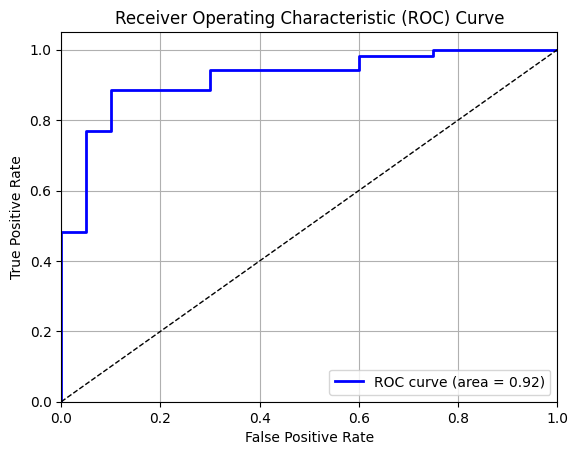

In [69]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Calculate the area under the curve

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show();

In [70]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.58      0.95      0.72        20
         1.0       0.97      0.73      0.84        52

    accuracy                           0.79        72
   macro avg       0.78      0.84      0.78        72
weighted avg       0.86      0.79      0.80        72



## Analysis of Changes before and after performing hyperparameter tuning for Logistic Regression

**Class 0:**

    Recall increased from 0.90 to 0.95, which means the model became better at identifying negatives after tuning, 
    though precision dropped slightly from 0.60 to 0.58.
    
    
**Class 1:**

    Precision improved slightly from 0.95 to 0.97, but recall decreased from 0.77 to 0.73, indicating that the model became more conservative in detecting positives (missing some true positives).
    
    
**Overall:**

    Accuracy dropped slightly from 0.81 to 0.79.
    
    
    Macro Avg Recall improved (from 0.83 to 0.84), but F1-scores stayed relatively stable (Macro Avg F1 from 0.79 to 0.78).
    Weighted Avg Precision improved slightly, but overall performance in terms of F1-score and recall dropped.
**Conclusion:**

    After tuning, the model became more conservative in predicting Class 1 (positive), slightly improving precision but sacrificing recall for Class 1.
    
    
    For Class 0, the model improved its recall, detecting more true negatives.
    
    
    If precision is more important than recall, the tuned model might be better. However, if maintaining a balance between precision and recall is crucial, the original (before tuning) model might be preferable.

## 2. Random forest

In [114]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

1. `n_estimators:`

Description: The number of trees in the forest. More trees usually lead to better performance but increase computational cost.


Typical Values: 100, 200, 500, 1000


2. `max_depth:`

Description: The maximum depth of each tree. Limiting depth can help prevent overfitting.


Typical Values: None (no limit), 10, 20, 30, 40, 50


3. `min_samples_split:`

Description: The minimum number of samples required to split an internal node. Higher values prevent splits that may not be significant.


Typical Values: 2, 5, 10


4. `min_samples_leaf:`

Description: The minimum number of samples that must be present in a leaf node. Helps to ensure that leaf nodes have a certain number of observations.


Typical Values: 1, 2, 5, 10


5. `max_features:`

Description: The number of features to consider when looking for the best split. This can be a fixed number or a fraction of total features.


Typical Values: 'auto' (sqrt), 'sqrt', 'log2', 0.5 (50% of features)


6. `bootstrap:`

Description: Whether to use bootstrap samples when building trees. If False, the whole dataset is used to build each tree.


Typical Values: True, False


7. `class_weight:`

Description: Weights associated with classes in the form {class_label: weight}. Useful for handling imbalanced datasets.


Typical Values: None, 'balanced', or a dictionary specifying weights for each class.


8. `criterion:`

Description: The function to measure the quality of a split.


Typical Values: 'gini' (default) or 'entropy'.


9. `max_samples` (for RandomForestClassifier in sklearn >= 0.22):

Description: If bootstrap is True, this parameter defines the number of samples to draw from X to train each base estimator.


Typical Values: A float between 0.0 and 1.0 representing the fraction of samples, or an integer for a fixed number of samples.

In [72]:
cv=StratifiedKFold()

In [115]:
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    scoring='accuracy',  
    cv=5,                
    n_jobs=-1,          
    verbose=4           
)

In [116]:
random_search_rf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   scoring='accuracy', verbose=4)

In [117]:
random_search_rf.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\U

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   scoring='accuracy', verbose=4)

In [118]:
# Get the best parameters and best score
best_params = random_search_rf.best_params_
best_score = random_search_rf.best_score_

In [119]:
print("Best Parameters (Random Search):", best_params)
print("Best Cross-Validation Score (Random Search):", best_score)

Best Parameters (Random Search): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}
Best Cross-Validation Score (Random Search): 0.8289740082079342


In [120]:
y_preds=random_search_rf.predict(X_test_selected)

In [121]:
y_pred_proba = random_search_rf.predict_proba(X_test_selected)[:, 1]

In [122]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

In [123]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8611111111111112
Precision: 0.8888888888888888
Recall: 0.9230769230769231
F1-score: 0.9056603773584906


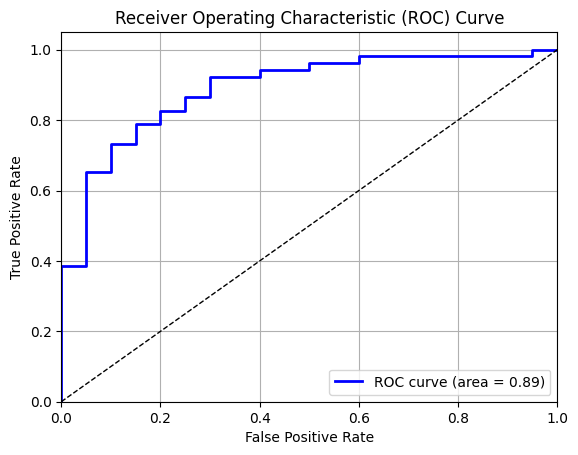

In [124]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Calculate the area under the curve

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show();

In [125]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74        20
         1.0       0.89      0.92      0.91        52

    accuracy                           0.86        72
   macro avg       0.83      0.81      0.82        72
weighted avg       0.86      0.86      0.86        72



In [126]:
best_model = random_search_rf.best_estimator_

In [87]:
# Get feature importance scores
feature_importances = best_model.feature_importances_

In [88]:
features = pd.DataFrame({
    'Feature': X_resampled.columns,  
    'Importance': feature_importances
})

In [89]:
# Sort the DataFrame by feature importance
features_sorted = features.sort_values(by='Importance', ascending=False)

In [90]:
features_sorted

,Feature,Importance
26,TechSupport_No,0.096813
35,Contract_Month-to-month,0.085646
4,Revenue_Contribution,0.060794
42,PaymentMethod_Electronic check,0.058399
1,TotalCharges,0.056949
17,OnlineSecurity_No,0.055789
3,AverageMonthlyCharge,0.050701
28,TechSupport_Yes,0.028869
37,Contract_Two year,0.028130
15,InternetService_Fiber optic,0.027015


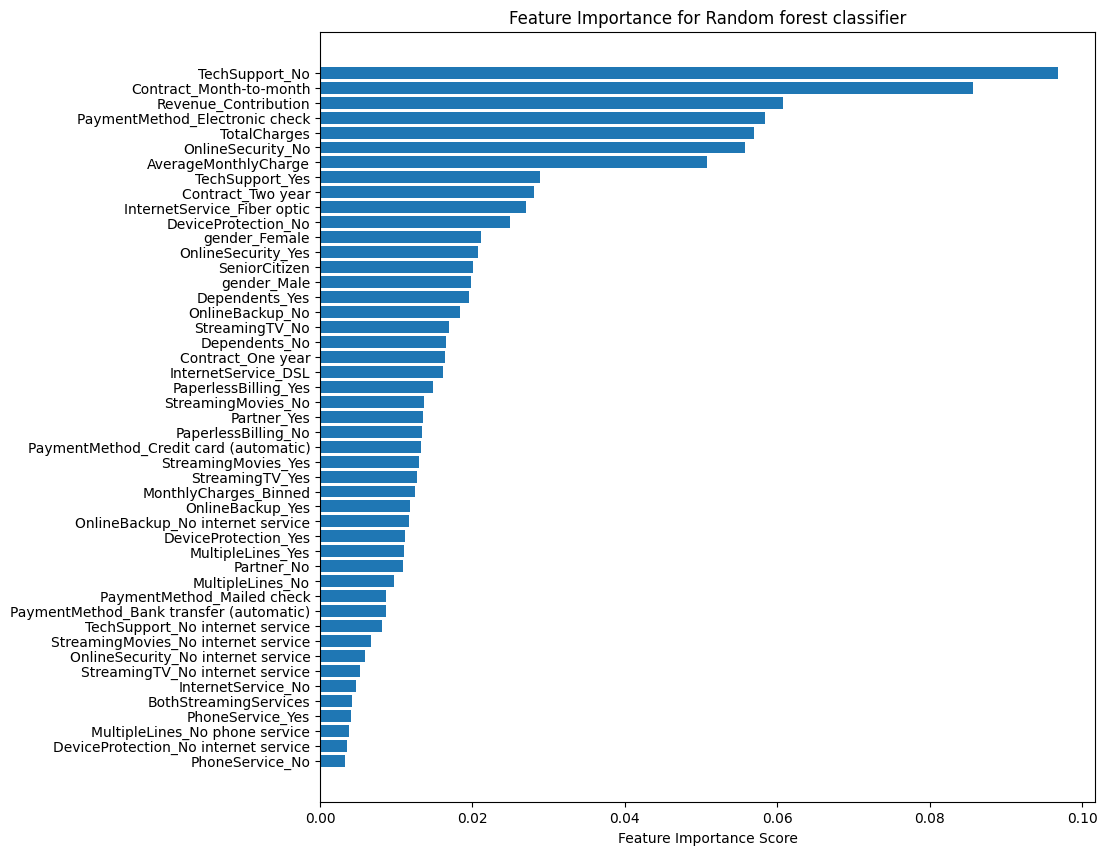

In [91]:
# Plotting the feature importances
plt.figure(figsize=(10,10))
plt.barh(features_sorted['Feature'], features_sorted['Importance'])
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance for Random forest classifier')
plt.gca().invert_yaxis()  # Invert to show most important feature at the top
plt.show()

## Key Changes after Hyperparameter Tuning:
**Class 0 (Negative):**

* Precision improved from 0.67 to 0.73.
* Recall improved significantly from 0.60 to 0.80, indicating the model became better at identifying negatives.
* F1-Score improved from 0.63 to 0.76, showing a better balance between precision and recall.


**Class 1 (Positive):**

* Precision improved from 0.85 to 0.92.
* Recall remained the same at 0.88.
* F1-Score improved from 0.87 to 0.90, indicating better overall performance for positive predictions.


**Overall:**

* Accuracy increased from 0.81 to 0.86.
* Macro Avg Precision increased from 0.76 to 0.82.
* Macro Avg Recall increased from 0.74 to 0.84.
* Macro Avg F1-Score increased from 0.75 to 0.83.
* Weighted Avg Precision, Recall, and F1-Score all improved after tuning.


**Conclusion:**
* After hyperparameter tuning, the Random Forest Classifier shows a significant improvement in performance across all metrics. The recall for Class 0 (Negative) improved drastically, leading to better overall accuracy and more balanced precision and recall. This suggests that hyperparameter tuning helped the model generalize better, particularly in detecting negatives, while maintaining or improving its ability to detect positives.

## 3. Gradient boosting

In [95]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [92]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.5, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 0.5],
    'loss': ['deviance', 'exponential']
}

1. `n_estimators:`

Description: The number of boosting stages to be run. More estimators can lead to better performance but also to overfitting.
    
    
Typical Values: 100, 200, 500, 1000
    
    
2. `learning_rate (or eta):`

Description: A factor that scales the contribution of each tree. Lower values make the model more robust but require more trees.
    
    
Typical Values: 0.01, 0.1, 0.2, 0.3
    
    
3. `max_depth:`

Description: The maximum depth of the individual trees. A lower value prevents overfitting by controlling the complexity of the model.


Typical Values: 3, 5, 7, 10


4. `min_samples_split:`

Description: The minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns.


Typical Values: 2, 5, 10


5. `min_samples_leaf:`

Description: The minimum number of samples that must be present in a leaf node. This helps ensure that leaf nodes have enough observations.


Typical Values: 1, 2, 5, 10


6. `subsample:`

Description: The fraction of samples to be used for fitting the individual base learners. It can help prevent overfitting by introducing randomness.


Typical Values: 0.5, 0.8, 1.0


7. `max_features:`

Description: The number of features to consider when looking for the best split. Can be a fixed number or a fraction of total features.


Typical Values: 'auto', 'sqrt', 0.5


8. `alpha:`

Description: The parameter used in quantile regression. It controls the quantile to be estimated.


Typical Values: 0.1, 0.2, 0.5


9. `loss:`

Description: The loss function to be optimized.


Typical Values: 'deviance' (logistic regression), 'exponential' (AdaBoost)


10. `warm_start:`

Description: Whether to reuse the solution of the previous call to fit and add more estimators to the ensemble.


Typical Values: True, False

In [93]:
cv=StratifiedKFold()

In [96]:
random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    scoring='accuracy',  
    cv=5,                
    n_jobs=-1,          
    verbose=4          
)

In [97]:
random_search_gb

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': ['auto', 'sqrt', 0.5],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.5, 0.8, 1.0]},
                   scoring='accuracy', verbose=4)

In [98]:
random_search_gb.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\khush\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': ['auto', 'sqrt', 0.5],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.5, 0.8, 1.0]},
                   scoring='accuracy', verbose=4)

In [99]:
# Get the best parameters and best score
best_params = random_search_gb.best_params_
best_score = random_search_gb.best_score_

In [100]:
print("Best Parameters (Random Search):", best_params)
print("Best Cross-Validation Score (Random Search):", best_score)

Best Parameters (Random Search): {'subsample': 0.5, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.1}
Best Cross-Validation Score (Random Search): 0.8477701778385771


In [101]:
y_preds=random_search_gb.predict(X_test_selected)

In [102]:
y_pred_proba = random_search_gb.predict_proba(X_test_selected)[:, 1]

In [103]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

In [104]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8194444444444444
Precision: 0.8545454545454545
Recall: 0.9038461538461539
F1-score: 0.8785046728971962


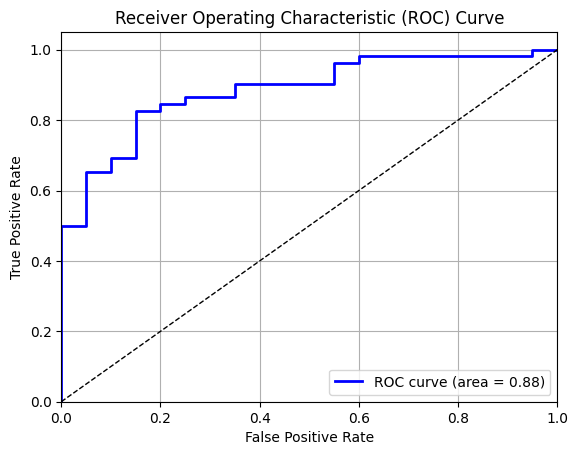

In [105]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Calculate the area under the curve

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show();

In [106]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.71      0.60      0.65        20
         1.0       0.85      0.90      0.88        52

    accuracy                           0.82        72
   macro avg       0.78      0.75      0.76        72
weighted avg       0.81      0.82      0.81        72



In [107]:
best_model = random_search_gb.best_estimator_

In [108]:
# Get feature importance scores
feature_importances = best_model.feature_importances_

In [109]:
features = pd.DataFrame({
    'Feature': X_resampled.columns,  # X_train is your feature set
    'Importance': feature_importances
})

In [110]:
# Sort the DataFrame by feature importance
features_sorted = features.sort_values(by='Importance', ascending=False)

In [111]:
features_sorted

,Feature,Importance
26,TechSupport_No,0.093051
1,TotalCharges,0.087825
3,AverageMonthlyCharge,0.084350
4,Revenue_Contribution,0.081386
35,Contract_Month-to-month,0.063975
17,OnlineSecurity_No,0.045180
42,PaymentMethod_Electronic check,0.036667
0,SeniorCitizen,0.034938
5,gender_Female,0.027202
6,gender_Male,0.025030


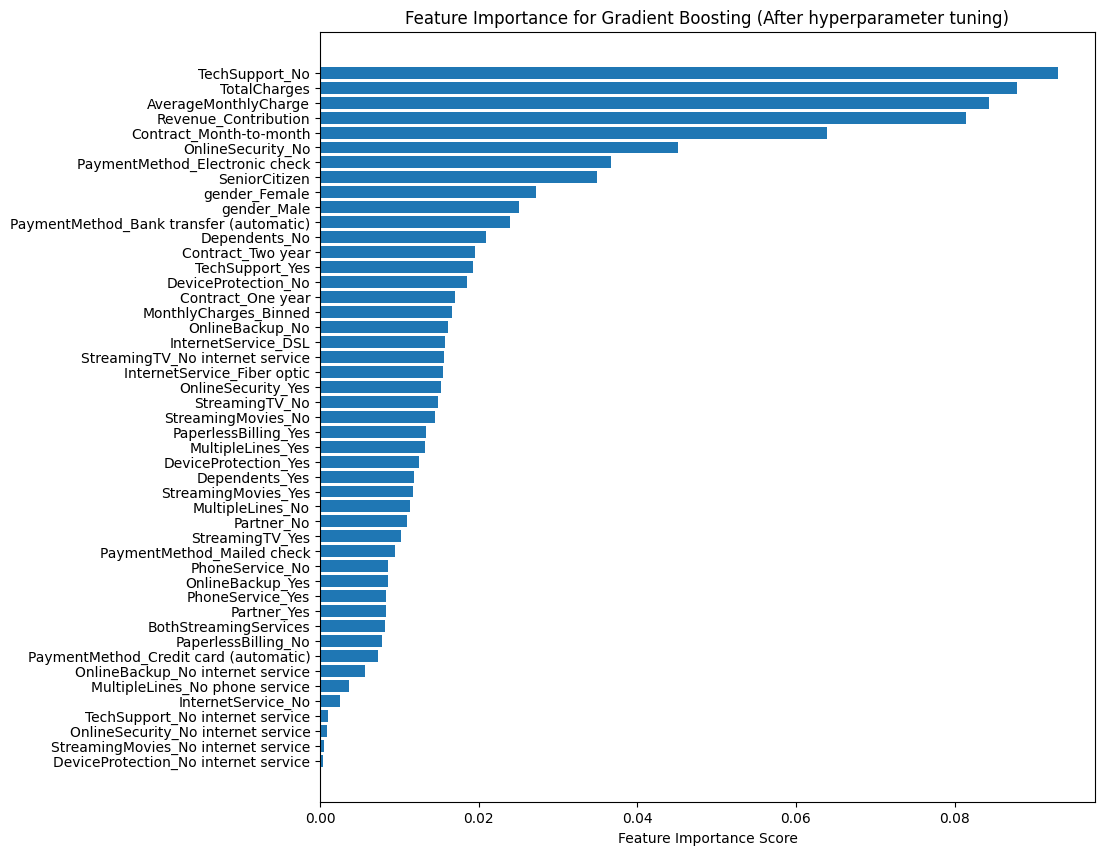

In [112]:
# Plotting the feature importances
plt.figure(figsize=(10,10))
plt.barh(features_sorted['Feature'], features_sorted['Importance'])
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance for Gradient Boosting (After hyperparameter tuning)')
plt.gca().invert_yaxis()  # Invert to show most important feature at the top
plt.show()

## Key Changes After Hyperparameter Tuning:
**Class 0 (Negative):**

Precision increased from 0.67 to 0.71, but recall decreased from 0.70 to 0.60, leading to a slight drop in the F1-score from 0.68 to 0.65.


**Class 1 (Positive):**

Precision slightly decreased from 0.88 to 0.85, but recall improved from 0.87 to 0.90. This resulted in a minor increase in the F1-score from 0.87 to 0.88.


**Overall:**

* **Accuracy** remained the same at 0.82.
* **Macro Avg Precision** improved from 0.77 to 0.78.
* **Macro Avg Recall** dropped slightly from 0.78 to 0.75.
* **Macro Avg F1-Score** dropped from 0.78 to 0.76.
* **Weighted Avg Precision** decreased slightly from 0.82 to 0.81, while Recall and F1-score remained almost unchanged.


**Conclusion:**

* Class 0 (Negative) saw a slight improvement in precision but a drop in recall, resulting in a lower F1-score.
* Class 1 (Positive) maintained a strong performance, with a small trade-off between precision and recall.
* While accuracy remained the same, the overall performance balance shifted slightly after tuning, with the model slightly favoring recall for positive predictions but losing some recall for negative predictions. If the focus is on improving precision for positive predictions, the tuning may have been useful, though it caused some trade-offs in other areas.

# Saving the model

In [131]:
directory = 'saved_models'

if not os.path.exists(directory):
    os.makedirs(directory)

In [132]:
model_path = os.path.join(directory, 'random_forest_model.pkl')
joblib.dump(best_model, model_path)

['saved_models\\random_forest_model.pkl']

In [133]:
model_path = os.path.join(directory, 'best_model.pkl')

In [134]:
# Save the model to a file
with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved successfully in {model_path}")

Model saved successfully in saved_models\best_model.pkl


In the case of **customer churn**, the primary focus should typically be on **recall**, although precision also plays a role. 
### Why Focus on Recall?
* **Recall** is the metric that tells you how many of the actual churners (customers who will leave) you correctly identified. In a churn prediction scenario, missing out on customers who are likely to leave (false negatives) can be costly, as these customers might churn without any retention effort.
* High recall ensures you catch most of the churners, allowing you to take action to retain them.
* For example, if recall is low, many customers who are likely to churn will not be flagged by the model, and no effort will be made to retain them. This leads to lost revenue opportunities.

### Precision is Also Important:
* **Precision** indicates how many of the customers identified as "likely to churn" actually do churn. If your precision is low, you're targeting a lot of customers who aren’t going to churn (false positives). This could lead to unnecessary marketing or retention efforts and wasted resources.
* However, in a customer churn context, it’s generally acceptable to have some false positives (low precision) as long as you are catching most of the actual churners (high recall). You can always implement retention strategies selectively after identifying potential churners.
### Ideal Approach:
* High recall ensures you don’t miss out on churners, but you don’t want precision to be too low either because that would mean investing too many resources in customers who aren't at risk.
* Therefore, the goal is to **maximize recall** while maintaining reasonably **good precision.**

# Analysis of model's performance:
1. Recall on Class 1 (Churners) is the most important metric for this customer churn use case, since we want to capture as many churners as possible.

2. **Based on Class 1 Recall:**

* Random Forest Classifier (Before and After Tuning) and Gradient Boosting Classifier (After Tuning) have the highest recall (0.88 to 0.90), meaning they are better at identifying potential churners.
3. Accuracy and Precision should also be considered for efficiency, but recall remains a priority. The Random Forest Classifier after tuning has:

* **Class 1 Recall: 0.88**


* **Overall Accuracy: 0.86**, which is the highest among all models.


4. Gradient Boosting Classifier (After Tuning) also performs well, with Class 1 Recall of 0.90, but with a slight drop in accuracy (0.82).

# Conclusion:
The best model for the customer churn use case is the **Random Forest Classifier (After Hyperparameter Tuning)**, as it strikes a strong balance between high recall for identifying churners (0.88) and overall accuracy (0.86).

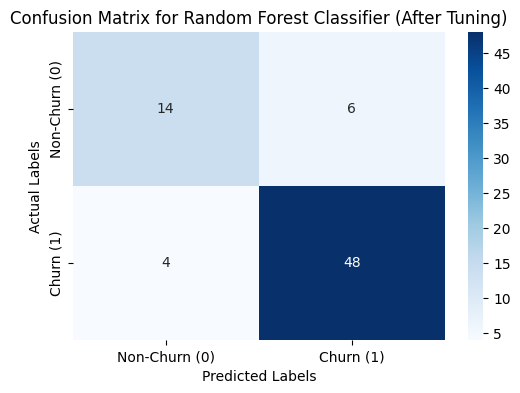

In [135]:
cm = confusion_matrix(y_test, y_preds)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Churn (0)', 'Churn (1)'], 
            yticklabels=['Non-Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix for Random Forest Classifier (After Tuning)')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show();

# Recommendations:

To reduce customer churn based on the analysis, here are some actionable insights and strategies:

### 1. Identify High-Risk Customers (Use Predictive Models)
* **Insight:** Use the Random Forest model to predict customers who are likely to churn. With a high recall (88%), this model helps identify most potential churners accurately.
* **Action:** Implement a customer segmentation strategy by categorizing customers based on their likelihood of churning. Develop targeted retention campaigns for those at high risk (e.g., special offers, personalized discounts, loyalty programs).
### 2. Improve Customer Support and Satisfaction
* **Insight:** A common reason for churn is dissatisfaction with support or services. Analyze churner data for common issues.
* **Action:** Establish a more proactive customer service approach by reaching out to customers before they express dissatisfaction. Offer real-time support via chatbots or 24/7 human agents for quicker issue resolution.
### 3. Enhance Customer Engagement
* **Insight:** Inconsistent engagement can lead to churn. Customers who do not frequently use the service may lose interest.
* **Action:** Increase engagement through regular communication, personalized product recommendations, and usage reminders. Offer webinars, tutorials, or exclusive content to educate and excite customers about product features.
### 4. Loyalty and Rewards Programs
* **Insight:** Retaining loyal customers can reduce churn significantly. Many customers might be leaving due to a lack of perceived value.
* **Action:** Implement a tier-based loyalty program where long-term customers get increasing rewards for continued use. This can include discounts, exclusive offers, or access to premium services.
### 5. Analyze Churn Reasons for Better Understanding
* **Insight:** Churn could be happening due to specific reasons such as product pricing, lack of certain features, or dissatisfaction with customer experience.
* **Action:** Conduct exit interviews or send out post-churn surveys to gather data on why customers are leaving. Use this data to address key issues, improve the product, and optimize pricing.
### 6. Offer Flexible Pricing or Subscription Models
* **Insight:** High churn might be due to price sensitivity, especially for customers with low engagement.
* **Action:** Introduce flexible pricing models, such as "pay-as-you-go" or freemium models, to allow customers to adjust their spending based on usage. Lower commitment options can encourage customers to stay.
### 7. Customer Onboarding and Education
* **Insight:** Customers who don't fully understand the product's value or how to use it effectively may churn early.
* **Action:** Improve onboarding processes by offering personalized onboarding sessions, tutorials, and check-ins during the early stages of a customer’s journey. This ensures they understand the full value of your product.
### 8. Predictive Retention Campaigns
* **Insight:** The predictive model can alert the business to customers who are starting to disengage or show churn behaviors.
* **Action:** Use the predictive churn model to trigger automated retention campaigns (e.g., sending personalized messages, offering discounts) based on early warning signs such as decreased usage or interaction.
### 9. Monitor and Improve Product Usage Analytics
* **Insight:** Low usage or unengaged customers are likely to churn.
* **Action:** Set up usage analytics dashboards to monitor customer engagement. Identify patterns where churners typically stop engaging with the product and focus on improving that part of the user journey. Provide targeted help to re-engage users before they churn.
### 10. Personalization and Tailored Solutions
* **Insight:** Churn often happens when a product does not meet specific needs or preferences.
* **Action:** Use customer data to offer personalized solutions. For example, recommend features based on their usage patterns or provide custom packages based on their behavior and history.